# Correlation Study Notebook
## Objectives
- Business requirement 1:
    - The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs
- outputs/datasets/cleaned/TrainSetCleaned.csv

## Outputs
- outputs/datasets/cleaned/TrainSetCleaned.csv

## Conclusions
- The price of a property is directly correlated with its quality and size, as well as its construction date.

---

# Change working directory
We need to change the working directory from its current folder to its parent folder

In [1]:
import os

current_path = os.getcwd()
os.chdir(os.path.dirname(current_path))
current_path = os.getcwd()
current_path

'/workspace/CI_PP5'

# Load Cleaned Data

In [2]:
import pandas as pd
TrainSet = pd.read_csv("outputs/datasets/cleaned/TrainSetCleaned.csv")
TrainSet.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,0.0,2.869214,2,48,0.0,1774,774,1.0,2007.0,...,11694,90.0,452.0,108,5,9,1822,2007,2007,314813
1,894,0.0,2.000000,0,0,1.0,894,308,0.0,1962.0,...,6600,60.0,0.0,0,5,5,894,1962,1962,109500
2,964,0.0,2.000000,0,713,5.0,163,432,1.0,1921.0,...,13360,80.0,0.0,0,7,5,876,1921,2006,163500
3,1689,0.0,3.000000,0,1218,6.0,350,857,2.0,2002.0,...,13265,69.0,148.0,59,5,8,1568,2002,2002,271000
4,1541,0.0,3.000000,0,0,1.0,1541,843,2.0,2001.0,...,13704,118.0,150.0,81,5,7,1541,2001,2002,205000


# Data Exploration

In [3]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

/tmp/ipykernel_17804/4017232469.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

## Correlation and PPS Analysis
We need to find the correlation between different features and the sales price. Let's start by 

## Pearson Correlation

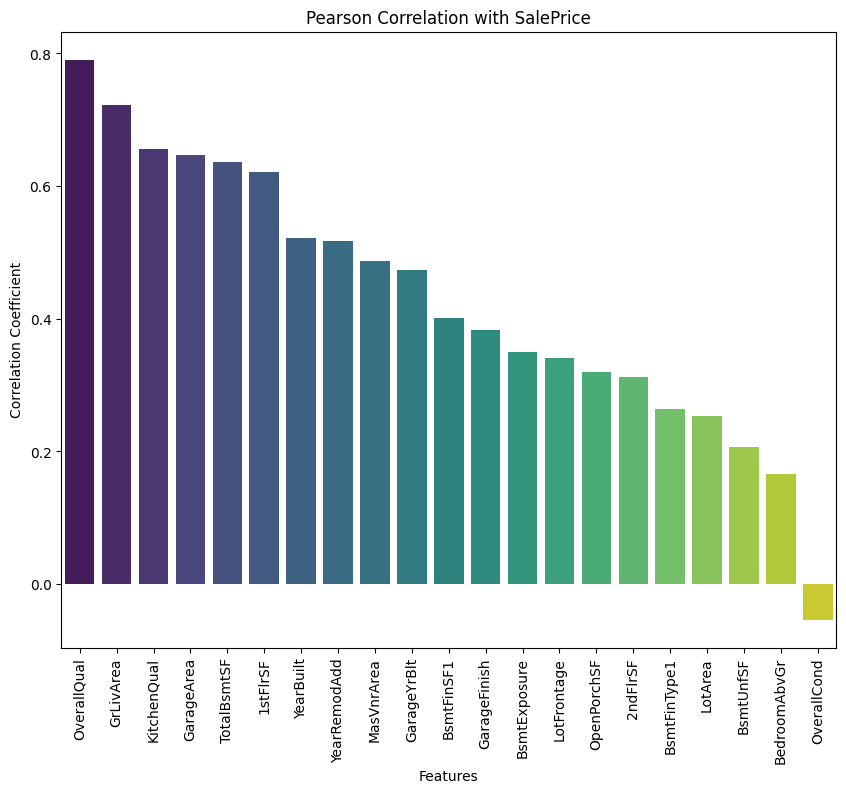

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

pearson_corr = TrainSet.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)

# Exlude the SalePrice correlation with itself
pearson_corr = pearson_corr.drop('SalePrice')

plt.figure(figsize=(10, 8))
sns.barplot(x=pearson_corr.index, y=pearson_corr.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Pearson Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

plt.show()

## Spearman Correlation

Text(0, 0.5, 'Correlation Coefficient')

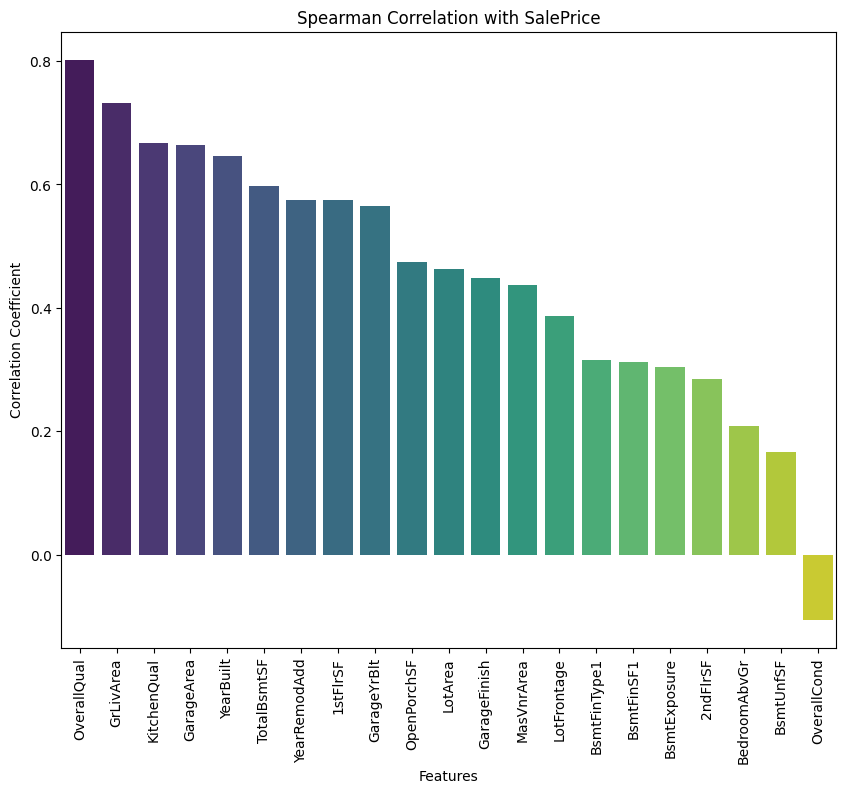

In [5]:
spearman_corr = TrainSet.corr(method='spearman')['SalePrice'].sort_values(ascending=False)

# Exlude the SalePrice correlation with itself
spearman_corr = spearman_corr.drop('SalePrice')

plt.figure(figsize=(10, 8))
sns.barplot(x=spearman_corr.index, y=spearman_corr.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Spearman Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

## Comparing results.
Both the Pearson and the Spearman correlations gives almost the same results, let's compare the results.


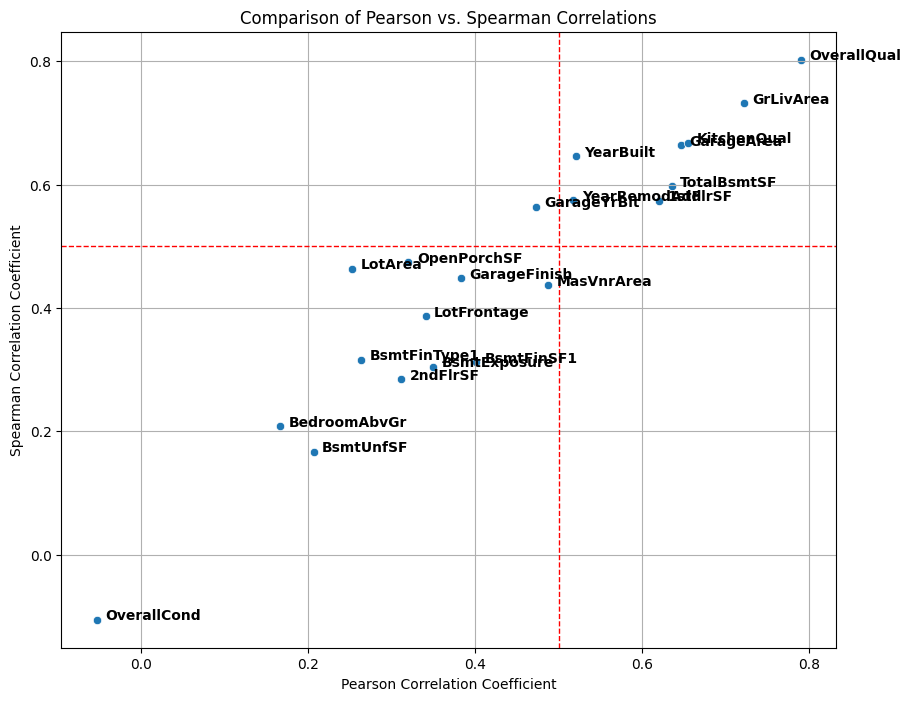

In [6]:
# Define the threshold
threshold = 0.5

correlation_comparison = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Pearson', y='Spearman', data=correlation_comparison)
plt.title('Comparison of Pearson vs. Spearman Correlations')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Spearman Correlation Coefficient')

plt.axhline(threshold, color='red', linestyle='--', linewidth=1)
plt.axvline(threshold, color='red', linestyle='--', linewidth=1)

for line in range(0, correlation_comparison.shape[0]):
    plt.text(correlation_comparison.Pearson[line]+0.01, correlation_comparison.Spearman[line], 
             correlation_comparison.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.grid(True)
plt.show()

In [7]:
pearson_features = pearson_corr[abs(pearson_corr) > threshold]
spearman_features = spearman_corr[abs(spearman_corr) > threshold]


result= list(set(pearson_features.index.to_list()) | set(spearman_features.index.to_list()))
result.append('SalePrice')
result

['GarageArea',
 'GarageYrBlt',
 '1stFlrSF',
 'YearBuilt',
 'KitchenQual',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearRemodAdd',
 'SalePrice']

Comparing the results of the two, we can see that these variables has the highest correlation to sales price:
- OverallQual
- GrLivArea
- KitchenQual
- GarageArea
- YearBuilt
- TotalBsmtSF
- GarageFinish
- YearRemodAdd
- 1stFlrSF
- GarageYrBlt

Moving forward, we can drop all the other variables.

# Save changes to the Train Set

In [8]:
df_corr = TrainSet.drop(columns=[col for col in TrainSet.columns if col not in result])

df_corr.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

# Conclusions
- The price of a property is directly correlated with its quality and size, as well as its construction date.